# <font color=darkblue>**Universidad Nacional Autónoma de México**
# <font color=darkblue>**Facultad de Ciencias**
# <font color=orange>**Práctica 2 de Temas Selectos de Análisis Numérico**
# Dra. Úrsula Iturrarán Viveros
# Semestre 2025 - 1

Nombres:
* Pablo Rogelio Ramírez Alferes
*

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display,Markdown
from tabulate import tabulate

## Ejercicio 1
Considera PVI del ejercicio 1 de la parte teórica de la tarea:
$$
\frac{dy}{dt} = 2 + \sqrt{y - 2t + 3},\quad y(0)=1.
$$

Obtén una solución numérica  usando el método de Euler en el intervalo $[0,1.5]$, con $h=0.01$. Obtén el máximo error absoluto comparando con la solución exacta dada por $y(t)=1+4t+\frac{1}{4}t^2$.

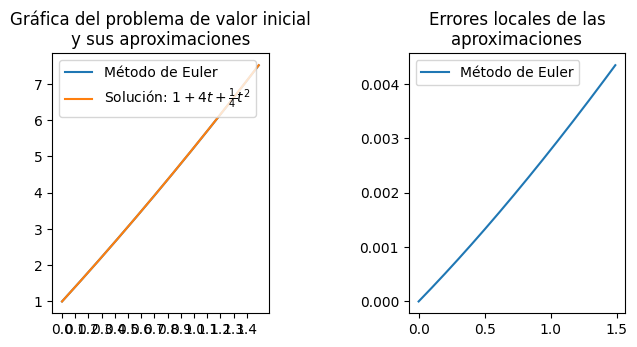

| Método          |   Máximo error absoluto |
|-----------------|-------------------------|
| Método de Euler |              0.00434122 |

In [ ]:
def EulerGenerator(f,a,y0,h=0.01):
  yn = y0
  a0 = a
  while True:
    yield yn
    yn = yn+h*f(a0,yn)
    a0 = a0+h

def EulerMethod(f,a,b,y0,h=0.01):
  l = []
  g = EulerGenerator(f,a,y0,h)
  for i in np.arange(a,b,h):
    l.append(next(g))
  return l

f = lambda t,y:2+np.sqrt(y-2*t+3)
a = np.array(EulerMethod(f,0,1.5,1))
g = lambda t: 1+4*t+0.25*t**2

fig,ax = plt.subplots(1,2)
fig.tight_layout(pad=5)
fig.set_size_inches(8,4)
ax[0].plot(np.arange(0,1.5,0.01),a,label="Método de Euler")
ax[0].plot(np.arange(0,1.5,0.01),g(np.arange(0,1.5,0.01)),\
         label="Solución: $1+4t+\\frac{1}{4}t^2$")
ax[0].legend()
ax[0].set_title("Gráfica del problema de valor inicial\ny sus aproximaciones")
ax[0].set_xticks(np.arange(0, 1.5, step=0.1))

ax[1].plot(np.arange(0,1.5,0.01),np.abs(a-g(np.arange(0,1.5,0.01))),\
         label="Método de Euler")
ax[1].set_title("Errores locales de las\naproximaciones")
ax[1].legend()
plt.show()
table = [['Método de Euler', np.max(np.abs(g(np.arange(0,1.5,0.01))-a))]]

display(Markdown(tabulate(table,headers=["Método","Máximo error absoluto"],\
                          tablefmt='github')))

## Ejercicio 2

Escribe un programa que mediante el método de Taylor de orden 2 para el problema de valor inicial

$$
\frac{dy}{dt} = t - 2y\quad y(0)=1,
$$

en $[0,1]$ con $h = 0.05$. Compara con la solución analítica $y(t)=\frac{1}{2}t-\frac{1}{4} + \frac{5}{4}e^{-2t}$. Obtén el máximo error absoluto del método numérico utilizado.

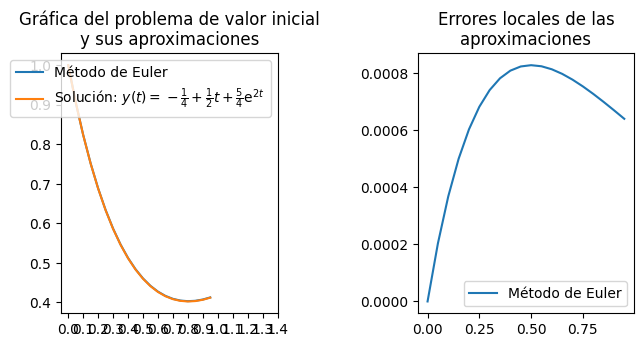

| Método           |   Máximo error absoluto |
|------------------|-------------------------|
| Método de Taylor |              0.00082693 |

In [ ]:
def TaylorGenerator(a,y0,h=0.05):
  yn = y0
  a0 = a
  while True:
    yield yn
    yn = yn + h*(a0-2*yn) + h**2/2*(1-2*a0+4*yn)
    a0 = a0+h
def TaylorMethod(a,b,y0,h=0.05):
  l = []
  g = TaylorGenerator(a,y0,h)
  for i in np.arange(a,b,h):
    l.append(next(g))
  return l

a = np.array(TaylorMethod(0,1,1))
g = lambda t: -0.25+0.5*t+1.25*np.exp(-2*t)

fig,ax = plt.subplots(1,2)
fig.tight_layout(pad=5)
fig.set_size_inches(8,4)
ax[0].plot(np.arange(0,1,0.05),a,label="Método de Euler")
ax[0].plot(np.arange(0,1,0.05),g(np.arange(0,1,0.05)),\
         label="Solución: $y(t)=-\\frac{1}{4}+\\frac{1}{2}t+\\frac{5}{4}\\mathrm{e}^{2t}$")
ax[0].legend()
ax[0].set_title("Gráfica del problema de valor inicial\ny sus aproximaciones")
ax[0].set_xticks(np.arange(0, 1.5, step=0.1))

ax[1].plot(np.arange(0,1,0.05),np.abs(a-g(np.arange(0,1,0.05))),\
         label="Método de Euler")
ax[1].set_title("Errores locales de las\naproximaciones")
ax[1].legend()
plt.show()
table = [['Método de Taylor', np.max(np.abs(g(np.arange(0,1,0.05))-a))]]

display(Markdown(tabulate(table,headers=["Método","Máximo error absoluto"],\
                          tablefmt='github')))

## Ejercicio 3

Considera los siguientes problemas de valor inicial:
$$
\begin{array}{cclc}
y' &=& 2(t+1),& y(0)=1\\
y' &=& \frac{2y}{t+1},& y(0)=1
\end{array}
$$

Ambos tienen como solución la función $y(t)=(t+1)^2$. Realiza lo siguiente:
> - <font color=blue> Escribe un programa que use el método de Runge-Kutta de orden 2, con $h=0.1$ y en el intervalo
$[0,1]$ para calcular una solución numérica para cada uno de los dos problemas de valor inicial. </font>
> - <font color=blue> Calcula el máximo error local de truncamiento para ambos problemas de valor inicial comparando con la solución exacta. </font>
> - <font color=blue> En un mismo plano cartesiano, grafica ambas soluciones numéricas y la solución exata. Escribe tus observaciones. </font>

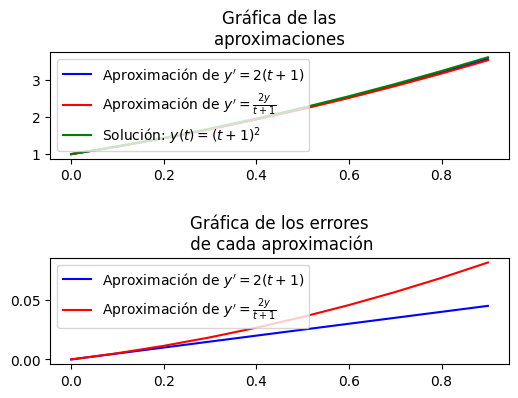

| Método: RK2                            |   Máximo error absoluto |
|----------------------------------------|-------------------------|
| Primera ecuación ($y'=2(t+1)$)         |               0.045     |
| Segunda ecuación ($y'=\frac{2y}{t+1}$) |               0.0814286 |

In [3]:
def RK2Generator(f,a,y0,h=0.1):
  yn = y0
  a0 = a
  while True:
    yield yn
    k1 = f(a0,yn)
    k2 = f(a0+h/2,yn+h/2*k1)
    yn = yn + h/2 *(k1 + k2)
    a0 = a0+h

def RK2Method(f,a,b,y0,h=0.1):
  l = []
  g = RK2Generator(f,a,y0,h)
  for i in np.arange(a,b,h):
    l.append(next(g))
  return l

f1 = lambda t,y: 2*(t+1)
f2 = lambda t,y: 2*y/(t+1)
a1 = RK2Method(f1,0,1,1)
a2 = RK2Method(f2,0,1,1)
g = lambda t: (t+1)**2

fig,ax = plt.subplots(2,1)
fig.tight_layout(pad=5)

dt = np.arange(0,1,0.1)

ax[0].plot(dt,a1,color="blue",label="Aproximación de $y'=2(t+1)$")
ax[0].plot(dt,a2,color="red",label="Aproximación de $y'=\\frac{2y}{t+1}$")
ax[0].plot(dt,g(dt),color="green",label="Solución: $y(t)=(t+1)^2$")
ax[0].legend()
ax[0].set_title('Gráfica de las\naproximaciones')

ax[1].plot(dt,np.abs(a1-g(dt)),color='blue',label="Aproximación de $y'=2(t+1)$")
ax[1].plot(dt,np.abs(a2-g(dt)),color='red',label="Aproximación de $y'=\\frac{2y}{t+1}$")
ax[1].legend()
ax[1].set_title('Gráfica de los errores\n de cada aproximación')
plt.show()

table = [["Primera ecuación ($y'=2(t+1)$)", np.max(np.abs(g(np.arange(0,1,0.1))-a1))],
         ["Segunda ecuación ($y'=\\frac{2y}{t+1}$)", np.max(np.abs(g(np.arange(0,1,0.1))-a2))]]

display(Markdown(tabulate(table,headers=["Método: RK2","Máximo error absoluto"],\
                          tablefmt='github')))

Podemos ver que la aproximación con la función $y'=2(t+1)$ es más efectiva que la otra función, y podemos ver que el error asociado a la función antes dicha crece más lento que la otra, sin embargo, en nuestra gráfica ded las aproximaciones, podemos ver que no existe gran diferencia dentro de ese intervalo, lo cual se refleja en el máximo de los errores en la aproximación por ambas funciones.

## Ejercicio 4

Escribe un programa que utilice el método de Runge-Kutta de orden 4 para obtener una solución numérica del problema de valor inicial:
$$
y' = \dfrac{y^2 + ty - t^2}{t^2}, \quad y(1)=2
$$

en el intervalo $[1,1.5]$ y con $h=0.05$. Calcula el máximo error comparando con la solución exacta
$y(t)=\frac{t(1+t^2/3)}{1-t^2/3}$ y grafica la solución numérica junto con la solución exacta.

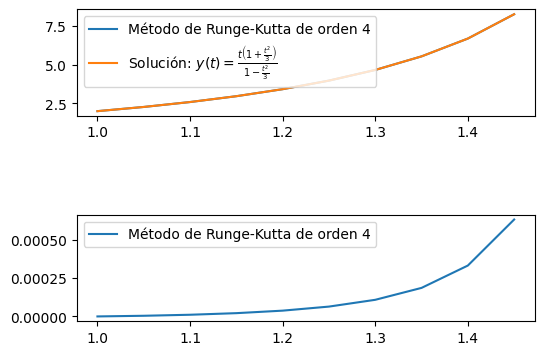

| Método                           |   Máximo error absoluto |
|----------------------------------|-------------------------|
| Método de Runge-Kutta de orden 4 |             0.000632646 |

In [ ]:
def RK4Generator(f,a,y0,h=0.05):
  yn = y0
  a0 = a
  while True:
    yield yn
    k1 = f(a0,yn)
    k2 = f(a0+h/2,yn+h/2*k1)
    k3 = f(a0+h/2,yn+h/2*k2)
    k4 = f(a0+h,yn+h*k3)
    yn = yn + h/6 *(k1 + 2*k2 + 2*k3 + k4)
    a0 = a0+h

def RK4Method(f,a,b,y0,h=0.05):
  l = []
  g = RK4Generator(f,a,y0,h)
  for i in np.arange(a,b,h):
    l.append(next(g))
  return l

f = lambda t,y: (y**2+t*y-t**2)/t**2
g = lambda t: (t*(1+t**2/3))/(1-t**2/3)
a = RK4Method(f,1,1.5,2)

dt = np.arange(1,1.5,0.05)

fig,ax = plt.subplots(2,1)
fig.tight_layout(pad=5)

ax[0].plot(dt,a,label='Método de Runge-Kutta de orden 4')
ax[0].plot(dt,g(dt),label='Solución: $y(t)=\\frac{t\\left(1+\\frac{t^2}{3}\\right)}{1-\\frac{t^2}{3}}$')
ax[0].legend()

ax[1].plot(dt,np.abs(g(dt)-a),label='Método de Runge-Kutta de orden 4')
ax[1].legend()

plt.show()

table = [['Método de Runge-Kutta de orden 4', np.max(np.abs(g(dt)-a))]]

display(Markdown(tabulate(table,headers=["Método","Máximo error absoluto"],\
                          tablefmt='github')))

## Ejercicio 5

Escribe un programa que mediante el método de Runge-Kutta de orden 4 obtenga una solución numérica del problema de valor inicial:

$$
\begin{array}{cclc}
u'(t) &=& v, & u(0)=0\\
v'(t) &=& -9.8, & v(0) = 49
\end{array}
$$

Considerando $h=0.05$ y en el intervalo $[0,10]$. Además, grafica $u$ contra $t$ y $v$ contra $t$. ¿Qué aspecto tienen ambas gráficas?

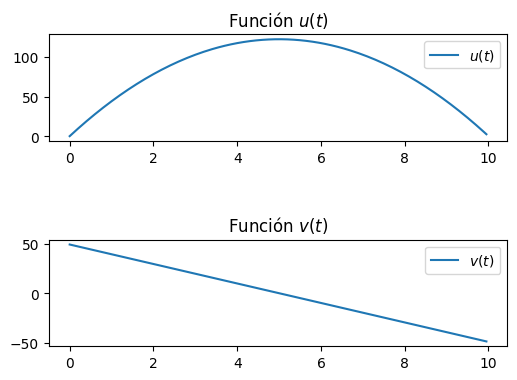

In [ ]:
def RK4Generator(f,a,y0,h=0.05):
  yn = y0
  a0 = a
  while True:
    yield yn
    k1 = f(a0,yn)
    k2 = f(a0+h/2,yn+h/2*k1)
    k3 = f(a0+h/2,yn+h/2*k2)
    k4 = f(a0+h,yn+h*k3)
    yn = yn + h/6 *(k1 + 2*k2 + 2*k3 + k4)
    a0 = a0+h

def RK4Method(f,a,b,y0,h=0.05):
  l = []
  g = RK4Generator(f,a,y0,h)
  for i in np.arange(a,b,h):
    l.append(next(g))
  return l

f = lambda t,y: np.array([[0,1],[0,0]])@y+np.array([[0],[-9.8]])
a = RK4Method(f,0,10,np.array([[0],[49]]))

dt = np.arange(0,10,0.05)

fig,ax = plt.subplots(2,1)
fig.tight_layout(pad=5)

ax[0].plot(dt,[i[0][0] for i in a],label='$u(t)$')
ax[0].legend()
ax[0].set_title('Función $u(t)$')

ax[1].plot(dt,[i[1][0] for i in a],label='$v(t)$')
ax[1].legend()
ax[1].set_title('Función $v(t)$')

plt.show()

La función $u(t)$ parece una parábola y la función $u'(t)=v(t)$ parece una recta, de hecho, se asemeja a un problema de caída libre, por la forma de la función $u$ y la pendiente de la 'recta' $v$.